# Minería de datos

**Integrantes:**
* Jean C. Trujillo P.
* Juan Cervantes

# Información de la data

### Titulo:  _Periodo 2017-enero hasta 2017-diciembre. Doce (12) ciclos._

### Descripción (proporcionada por la página): 
> Las regalías son la contraprestación económica a favor del Estado por la explotación de recursos no renovables, como petróleo y gas, que se le otorgan a departamentos y municipios en cuyo territorio se adelantan explotaciones, y a los puertos por donde se transportan dichos recursos. Se incluyen los datos de producción de hidrocarburos y regalías, clasificados por departamento, municipio, contrato y campo durante el año 2017.

Link de la data: https://www.datos.gov.co/Minas-y-Energ-a/Producci-n-y-Regal-as-por-Campo-2017/adet-54dq

### Resumen de la data: 
Básicamente, este párrafo habla sobre las regalías y su relación con la explotación de recursos no renovables como el petróleo y el gas.

Las regalías son una contraprestación económica que el Estado recibe a cambio de permitir que empresas exploten los recursos naturales que se encuentran en su territorio. En este caso, específicamente, se refiere al petróleo y al gas. Los departamentos y municipios donde se llevan a cabo estas explotaciones también reciben una parte de las regalías, así como los puertos por los que se transportan estos recursos.

Con esa información, nos enfocaremos específicamente en estos datos:
* Departamentos.
* Municipios.
* Tipo de contrato.
* Regalías.
* Porcentaje de Regalias.
* Precio Hidrocarburo USD.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Carga del archivo CSV

In [ ]:
data = pd.read_csv('Produccion_Regalias_por_Campo_2017.csv')

# Información de los datos

Visualizamos los datos de la data, con el método .info() donde se mostrará cada columna, filas, cantidad de datos, sí hay datos nulos y el tipo de dato de esa fila en específico

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16868 entries, 0 to 16867
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ITEM                     16868 non-null  int64  
 1   Departamento             16868 non-null  object 
 2   Municipio                16868 non-null  object 
 3   Año                      16868 non-null  int64  
 4   Mes                      16868 non-null  int64  
 5   Contrato                 16868 non-null  object 
 6   Campo                    16868 non-null  object 
 7   Tipo Prod                16868 non-null  object 
 8   Tipo Hidrocarburo        16868 non-null  object 
 9   Precio Hidrocarburo USD  15937 non-null  float64
 10  Porc Regalia             16868 non-null  float64
 11  Prod. Gravable Bls/Kpc   16868 non-null  float64
 12  Volumen Regalia Bls/Kpc  16868 non-null  float64
 13  Regalias COP             16868 non-null  float64
 14  Trm Promedio          

Se tiene un total de 16 columnas teniendo los siguientes tipo de datos:
* Float64 - 6 columnas
* int64 - 3 columnas
* object - 7 columnas

Teniendo un total de **16.868 filas**

En otras palabras, tenemos 7 columnas de tipo texto, y 9 columnas de tipo numérico en donde nos **enfocaremos** especificamente en las siguientes columnas:
* Departamentos. **(cualitativo - categórico)**
* Municipios. **(cualitativo - categórico)**
* Tipo de contrato. **(cualitativo - categórico)**
* Regalías. **(cuantitativo - discretas)**
* Porcentaje de Regalias. **(cuantitativo - discretas)**
* Precio Hidrocarburo USD. **(cuantitativo - discretas)**

#### ¿Por qué enfocarnos en estas columnas?

La importancia de esta data es **localizar** los departamentos junto con sus municipios, las **regalías que se obtuvo** luego de que la empresa encargada, explotara los recursos siguiendo el tipo de contrato que se le haya asignado.

## Datos nulos

Antes de empezar, se puede notar (en la tabla presentada anteriormente) que **faltan datos** en la columna de **"Precio Hidrocarburo USD"** y se puede comprobar de la siguiente manera:

In [ ]:
data.isnull().sum()

ITEM                         0
Departamento                 0
Municipio                    0
Año                          0
Mes                          0
Contrato                     0
Campo                        0
Tipo Prod                    0
Tipo Hidrocarburo            0
Precio Hidrocarburo USD    931
Porc Regalia                 0
Prod. Gravable Bls/Kpc       0
Volumen Regalia Bls/Kpc      0
Regalias COP                 0
Trm Promedio                 0
Regimen Reg                  0
dtype: int64

Existen **931 datos faltantes** en la columna **"Precio Hidrocarburo USD"**

# Primeros 5 registros

Para visualizar los primeros registros de la data, se usa el método **.head()** (que por defecto, muestra 5 registros. Se puede modificar para mostrar más de 5 si se escribe el valor como parámetro)

In [ ]:
data.head()

,ITEM,Departamento,Municipio,Año,Mes,Contrato,Campo,Tipo Prod,Tipo Hidrocarburo,Precio Hidrocarburo USD,Porc Regalia,Prod. Gravable Bls/Kpc,Volumen Regalia Bls/Kpc,Regalias COP,Trm Promedio,Regimen Reg
0,323,ARAUCA,ARAUCA,2017,1,CRAVO NORTE,REDONDO,QB,G,6.05,0.20,3.0,0.60,1.067775e+04,2941.4,Ley 141 20%
1,1,ANTIOQUIA,PUERTO NARE,2017,1,CONTRATO DE COLABORACIÓN EMPRESARIAL CAMPO ÁRE...,AREA TECA-COCORNA,I,O,37.63,0.06,0.0,0.00,0.000000e+00,2941.4,Ley 756 8% variable
2,2,ANTIOQUIA,PUERTO NARE,2017,1,NARE ASOCIACION,NARE,B,G,3.06,0.20,0.0,0.00,0.000000e+00,2941.4,Ley 141 20%
3,3,ANTIOQUIA,PUERTO NARE,2017,1,NARE ASOCIACION,NARE,B,O,30.32,0.20,8424.0,1684.80,1.502693e+08,2941.4,Ley 141 20%
4,4,ANTIOQUIA,PUERTO NARE,2017,1,NARE ASOCIACION,UNDERRIVER,P,O,28.52,0.06,29006.0,1740.36,1.459930e+08,2941.4,Ley 756 8% variable


# Grupo de filas

Usando **data.iloc**, podemos visualizar un rango de filas de la data.

In [ ]:
data.iloc[30:35]

,ITEM,Departamento,Municipio,Año,Mes,Contrato,Campo,Tipo Prod,Tipo Hidrocarburo,Precio Hidrocarburo USD,Porc Regalia,Prod. Gravable Bls/Kpc,Volumen Regalia Bls/Kpc,Regalias COP,Trm Promedio,Regimen Reg
30,30,ANTIOQUIA,PUERTO NARE,2017,2,OPERACION-DIRECTA ECOPETROL,AREA TECA-COCORNA,I,O,39.70,0.06,14850.0,891.00,1.018492e+08,2879.57,Ley 756 8% variable
31,31,ANTIOQUIA,PUERTO NARE,2017,3,CONTRATO DE COLABORACIÓN EMPRESARIAL CAMPO ÁRE...,AREA TECA-COCORNA,I,O,37.59,0.06,0.0,0.00,0.000000e+00,2942.29,Ley 756 8% variable
32,32,ANTIOQUIA,PUERTO NARE,2017,3,NARE ASOCIACION,NARE,B,O,30.33,0.20,7840.0,1568.00,1.399181e+08,2942.29,Ley 141 20%
33,33,ANTIOQUIA,PUERTO NARE,2017,3,NARE ASOCIACION,NARE,B,G,3.03,0.20,0.0,0.00,0.000000e+00,2942.29,Ley 141 20%
34,34,ANTIOQUIA,PUERTO NARE,2017,3,NARE ASOCIACION,UNDERRIVER,P,O,28.70,0.06,27287.0,1637.22,1.382361e+08,2942.29,Ley 756 8% variable


# Grupo de columnas

Para seleccionar un grupo de columnas, se hace usando doble corchete.

In [ ]:
data[['Departamento', 'Municipio', 'Contrato']]

,Departamento,Municipio,Contrato
0,ARAUCA,ARAUCA,CRAVO NORTE
1,ANTIOQUIA,PUERTO NARE,CONTRATO DE COLABORACIÓN EMPRESARIAL CAMPO ÁRE...
2,ANTIOQUIA,PUERTO NARE,NARE ASOCIACION
3,ANTIOQUIA,PUERTO NARE,NARE ASOCIACION
4,ANTIOQUIA,PUERTO NARE,NARE ASOCIACION
...,...,...,...
16863,TOLIMA,SAN LUIS,CPI ORTEGA OTROSI 1
16864,VICHADA,SANTA ROSALIA,LAS GARZAS
16865,VICHADA,SANTA ROSALIA,LAS GARZAS
16866,VICHADA,SANTA ROSALIA,LAS GARZAS


# Consulta de tres campos cuantitativos

## Muestra general

Acá podemos ver una vista estadística general de la data

In [ ]:
data.describe()

,ITEM,Año,Mes,Precio Hidrocarburo USD,Porc Regalia,Prod. Gravable Bls/Kpc,Volumen Regalia Bls/Kpc,Regalias COP,Trm Promedio
count,16868.000000,16868.0,16868.000000,15937.000000,16868.000000,1.686800e+04,16868.000000,1.686800e+04,16868.000000
mean,8434.500000,2017.0,5.530828,23.467621,0.118043,4.430531e+04,5671.184741,2.947251e+08,2944.272921
std,4869.516506,0.0,3.600516,18.749537,0.059522,2.071434e+05,32618.795736,1.867754e+09,44.955142
min,1.000000,2017.0,1.000000,0.000000,0.050000,0.000000e+00,0.000000,0.000000e+00,2877.820000
25%,4217.750000,2017.0,2.000000,4.200000,0.060000,1.600000e+01,1.837500,2.655340e+04,2917.090000
50%,8434.500000,2017.0,5.000000,30.410000,0.080000,2.497640e+03,264.755000,1.074501e+07,2942.290000
75%,12651.250000,2017.0,9.000000,40.230000,0.200000,1.512200e+04,1560.857500,1.156540e+08,2973.200000
max,16868.000000,2017.0,12.000000,62.240000,0.200000,3.480914e+06,696182.800000,5.995225e+10,3036.580000


## Media

In [ ]:
data['Regalias COP'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0        1.067775e+04
1        0.000000e+00
2        0.000000e+00
3        1.502693e+08
4        1.459930e+08
             ...     
16863    3.848819e+05
16864    0.000000e+00
16865    0.000000e+00
16866    0.000000e+00
16867    0.000000e+00
Name: Regalias COP, Length: 16868, dtype: float64>

In [ ]:
data['Porc Regalia'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0        0.20
1        0.06
2        0.20
3        0.20
4        0.06
         ... 
16863    0.08
16864    0.06
16865    0.08
16866    0.08
16867    0.06
Name: Porc Regalia, Length: 16868, dtype: float64>

In [ ]:
data['Precio Hidrocarburo USD'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0         6.05
1        37.63
2         3.06
3        30.32
4        28.52
         ...  
16863    48.48
16864      NaN
16865    36.96
16866    36.57
16867      NaN
Name: Precio Hidrocarburo USD, Length: 16868, dtype: float64>

## Mediana

Se procede a usar el método .median para obtener la media de las tres columnas seleccionadas anteriormente

In [ ]:
data['Regalias COP'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0        1.067775e+04
1        0.000000e+00
2        0.000000e+00
3        1.502693e+08
4        1.459930e+08
             ...     
16863    3.848819e+05
16864    0.000000e+00
16865    0.000000e+00
16866    0.000000e+00
16867    0.000000e+00
Name: Regalias COP, Length: 16868, dtype: float64>

In [ ]:
data['Porc Regalia'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0        0.20
1        0.06
2        0.20
3        0.20
4        0.06
         ... 
16863    0.08
16864    0.06
16865    0.08
16866    0.08
16867    0.06
Name: Porc Regalia, Length: 16868, dtype: float64>

In [ ]:
data['Precio Hidrocarburo USD'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0         6.05
1        37.63
2         3.06
3        30.32
4        28.52
         ...  
16863    48.48
16864      NaN
16865    36.96
16866    36.57
16867      NaN
Name: Precio Hidrocarburo USD, Length: 16868, dtype: float64>

## Maximo

Con el método .max() podemos obtener los valores máximos de cada columna

In [ ]:
data['Regalias COP'].max()

59952248926.87

In [ ]:
data['Porc Regalia'].max()

0.2

In [ ]:
data['Precio Hidrocarburo USD'].max()

62.24

## Mínimo

Con el método .max() podemos obtener los valores mínimos de cada columna

In [ ]:
data['Regalias COP'].min()

0.0

In [ ]:
data['Porc Regalia'].min()

0.05

In [ ]:
data['Precio Hidrocarburo USD'].min()

0.0

## Moda

Con la moda, podemos sacar el valor que se repite con mayor frecuencia en las columnas

In [ ]:
data['Regalias COP'].mode()

0    0.0
Name: Regalias COP, dtype: float64

In [ ]:
data['Porc Regalia'].mode()

0    0.2
Name: Porc Regalia, dtype: float64

In [ ]:
data['Precio Hidrocarburo USD'].mode()

0    0.0
Name: Precio Hidrocarburo USD, dtype: float64

## Histogramas

> Un histograma es un gráfico que usa barras para simbolizar cómo se distribuye un conjunto de datos. También sirve para ver rápidamente cómo se ha comportado una muestra basada en una variable numérica o cuantitativa. Por ejemplo, cómo varían las edades en un grupo de artistas de una banda sinfónica.

#### En el siguiente histograma (Regalías COP), tenemos una representacion del porcentaje de las regalías, donde la parte horizontal son los porcentajes, y la parte vertical es la cantidad que corresponde a cada porcentaje.

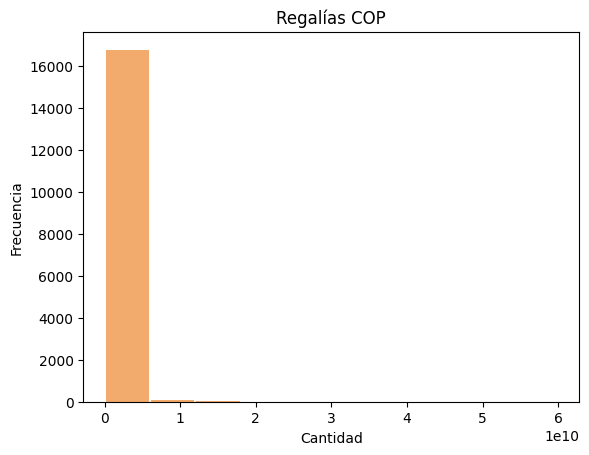

In [ ]:
plt.hist(x=data['Regalias COP'], color= '#F2AB6D', rwidth=0.95)
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
plt.title("Regalías COP")
plt.show()

#### En el siguiente histograma (Porcentaje de regalías), muestra el porcentaje de las regalías, donde la parte horizontal son los porcentajes, y la parte vertical es la frecuencia

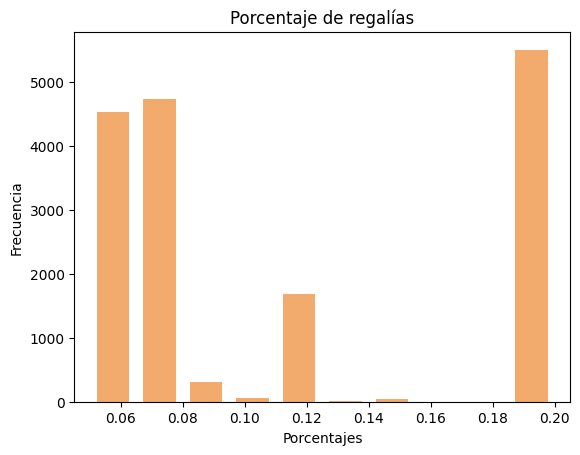

In [ ]:
plt.hist(x=data['Porc Regalia'], color= '#F2AB6D', rwidth=0.7)
plt.xlabel("Porcentajes")
plt.ylabel("Frecuencia")
plt.title("Porcentaje de regalías")
plt.show()

#### En el siguiente histograma (Hidrocarburos), muestra la representacion del precio del hidrocarburo en dolares, donde la parte horizontal son los dólares, y la parte vertical es la frecuencia

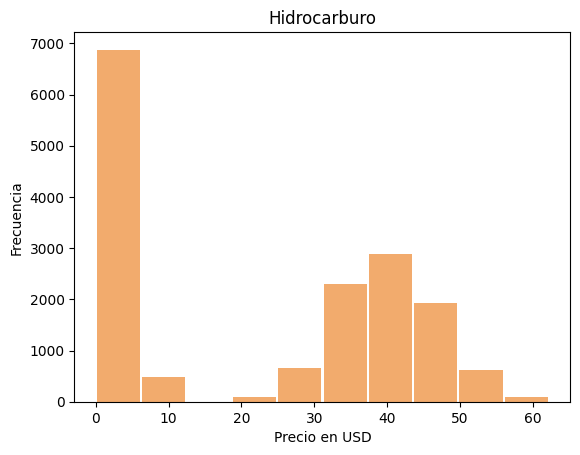

In [ ]:
plt.hist(x=data['Precio Hidrocarburo USD'], color= '#F2AB6D', rwidth=0.95)
plt.xlabel("Precio en USD")
plt.ylabel("Frecuencia")
plt.title("Hidrocarburo")
plt.show()

## Caja de bigotes

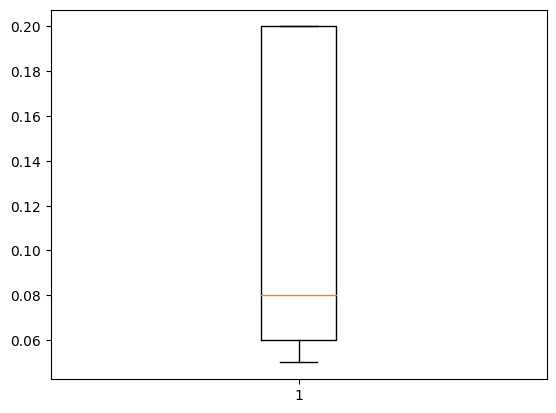

In [ ]:
plt.boxplot((data['Porc Regalia']))
plt.show()

#### En esta caja de bigotes que es la representacion de unos datos numericos a traves de sus cuartiles, aqui podemos observar que en el porcentaje de regalia no hubo ningun dato atípico es decir, todos los datos estan dentro del porcentaje que se maneja.

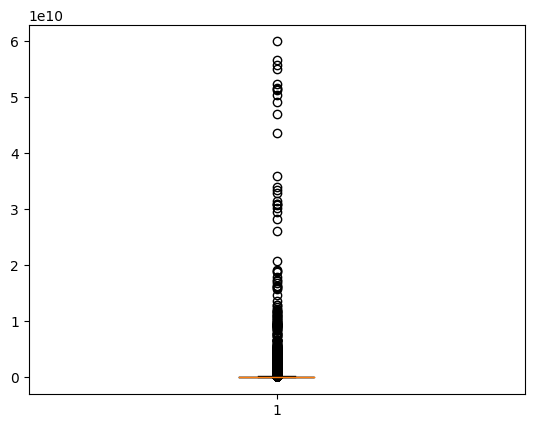

In [ ]:
plt.boxplot((data['Regalias COP']))
plt.show()

#### En la caja de bigotes para el volumen de Regalias COP podemos observar que una gran parte de sus datos son atipicos, es decir que se sobrepasan de la medida o del porcentaje que se habia tenido en cuenta y por eso se salen del porcentaje.

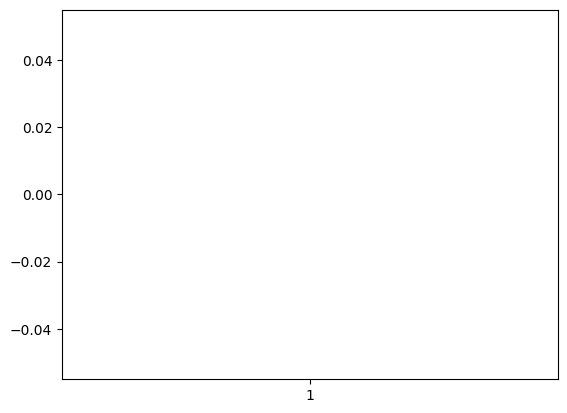

In [ ]:
plt.boxplot((data['Precio Hidrocarburo USD']))
plt.show()

# Variables cualitativas

### Frecuencia absoluta y la frecuencia relativa

> La frecuencia absoluta es el número de veces que se repite algo y la frecuencia relativa es la proporción que representa la frecuencia absoluta en relación con el total.

## Frecuencia absoluta

In [ ]:
f_absoluta=pd.value_counts(data['Departamento'])
f_absoluta

CASANARE              6460
META                  2438
HUILA                 1608
SANTANDER             1146
ARAUCA                1123
TOLIMA                 847
PUTUMAYO               711
CESAR                  565
BOYACA                 307
ANTIOQUIA              279
NORTE DE SANTANDER     244
SUCRE                  231
BOLIVAR                195
MAGDALENA              153
GUAJIRA                153
CORDOBA                112
CUNDINAMARCA           111
CAUCA                   85
DEPARTAMENTO NN         35
ATLANTICO               33
NARIÑO                  27
VICHADA                  4
CAQUETA                  1
Name: Departamento, dtype: int64

In [ ]:
f_absoluta=pd.value_counts(data['Municipio'])
f_absoluta

TAURAMENA                 1269
AGUAZUL                   1178
OROCUE                     973
YOPAL                      882
ARAUQUITA                  683
                          ... 
FONSECA                      3
VILLANUEVA                   3
FUENTE DE ORO                3
PUERTO LLERAS                2
SAN VICENTE DEL CAGUAN       1
Name: Municipio, Length: 122, dtype: int64

In [ ]:
f_absoluta=pd.value_counts(data['Contrato'])
f_absoluta

ECOP-SDLA-OP-DIRECTA          1340
PIJAO POTRERILLO               884
APIAY                          617
CRAVO NORTE                    459
CUBARRAL                       442
                              ... 
ECOP OP DIRECTA D.SUR            2
E&P SABANERO METAPETROLEUM       1
E&P DURILLO                      1
LLANOS 66                        1
LLANOS 33                        1
Name: Contrato, Length: 210, dtype: int64

## Frecuencia relativa

In [ ]:
f_relativa = 100 * data['Departamento'].value_counts() / len(data['Departamento'])
f_relativa

CASANARE              38.297368
META                  14.453403
HUILA                  9.532843
SANTANDER              6.793929
ARAUCA                 6.657576
TOLIMA                 5.021342
PUTUMAYO               4.215082
CESAR                  3.349538
BOYACA                 1.820014
ANTIOQUIA              1.654019
NORTE DE SANTANDER     1.446526
SUCRE                  1.369457
BOLIVAR                1.156035
MAGDALENA              0.907043
GUAJIRA                0.907043
CORDOBA                0.663979
CUNDINAMARCA           0.658051
CAUCA                  0.503913
DEPARTAMENTO NN        0.207493
ATLANTICO              0.195637
NARIÑO                 0.160066
VICHADA                0.023714
CAQUETA                0.005928
Name: Departamento, dtype: float64

In [ ]:
f_relativa = 100 * data['Municipio'].value_counts() / len(data['Municipio'])
f_relativa

TAURAMENA                 7.523121
AGUAZUL                   6.983638
OROCUE                    5.768319
YOPAL                     5.228836
ARAUQUITA                 4.049087
                            ...   
FONSECA                   0.017785
VILLANUEVA                0.017785
FUENTE DE ORO             0.017785
PUERTO LLERAS             0.011857
SAN VICENTE DEL CAGUAN    0.005928
Name: Municipio, Length: 122, dtype: float64

In [ ]:
f_relativa = 100 * data['Contrato'].value_counts() / len(data['Contrato'])
f_relativa

ECOP-SDLA-OP-DIRECTA          7.944036
PIJAO POTRERILLO              5.240692
APIAY                         3.657814
CRAVO NORTE                   2.721129
CUBARRAL                      2.620346
                                ...   
ECOP OP DIRECTA D.SUR         0.011857
E&P SABANERO METAPETROLEUM    0.005928
E&P DURILLO                   0.005928
LLANOS 66                     0.005928
LLANOS 33                     0.005928
Name: Contrato, Length: 210, dtype: float64

# Graficos de barras y torta para cada variable cualitativa

### Al tener una gran cantidad de filas en la data, se mostrarán solamente los 5 primeros con mayor aparición

# Gráfico de barras

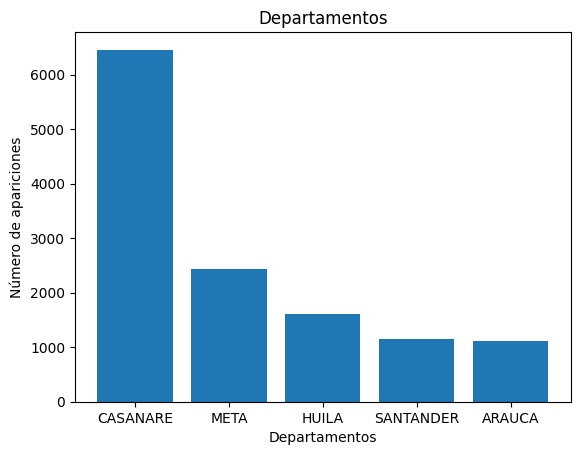

In [ ]:
# Contar las apariciones de los valores en la columna "Departamentos"
con = data['Departamento'].value_counts()

# Seleccionar los 5 departamentos con más apariciones
top_departamentos = con.nlargest(5)

# Filtrar el DataFrame para incluir solo las filas con las departamentos más comunes
data_top_departamentos = data[data['Departamento'].isin(top_departamentos.index)]

# Crear un gráfico de barras que muestra la cantidad de personas en cada departamento
plt.bar(top_departamentos.index, top_departamentos.values)
plt.title('Departamentos')
plt.xlabel('Departamentos')
plt.ylabel('Número de apariciones')
plt.show()

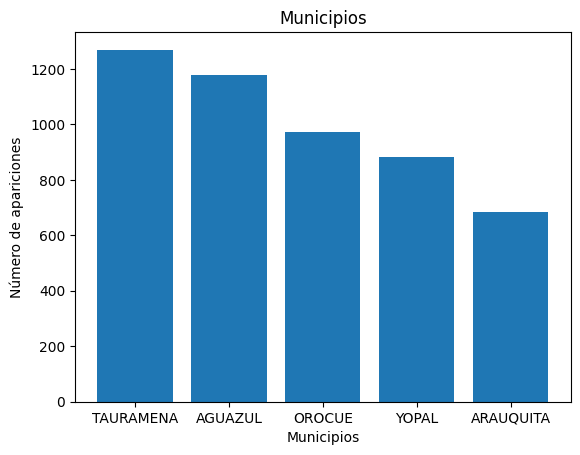

In [ ]:
# Contar las apariciones de los valores en la columna "Municipio"
con = data['Municipio'].value_counts()

# Seleccionar los 5 municipios con más apariciones
top_municipio = con.nlargest(5)

# Filtrar el DataFrame para incluir solo las filas con las municipio más comunes
data_top_municipio = data[data['Municipio'].isin(top_municipio.index)]

# Crear un gráfico de barras que muestra la cantidad de personas en cada ciudad
plt.bar(top_municipio.index, top_municipio.values)
plt.title('Municipios')
plt.xlabel('Municipios')
plt.ylabel('Número de apariciones')
plt.show()

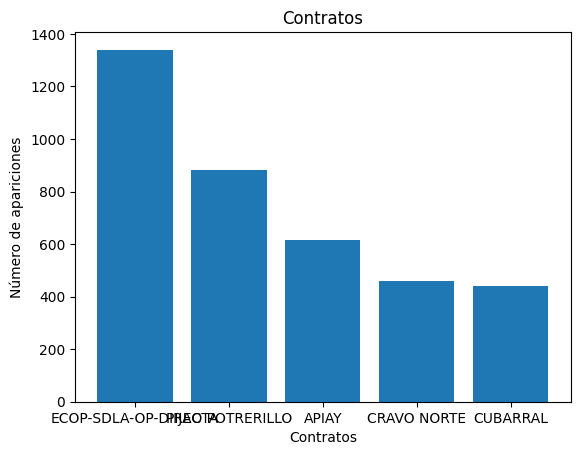

In [ ]:
# Contar las apariciones de los valores en la columna "Contrato"
counts = data['Contrato'].value_counts()

# Seleccionar las 5 contratos con más apariciones
top_contratos = counts.nlargest(5)

# Filtrar el DataFrame para incluir solo las filas con los contratos más comunes
data_top_contratos= data[data['Contrato'].isin(top_contratos.index)]

plt.bar(top_contratos.index, top_contratos.values)
plt.title('Contratos')
plt.xlabel('Contratos')
plt.ylabel('Número de apariciones')
plt.show()



## Gráficos de torta

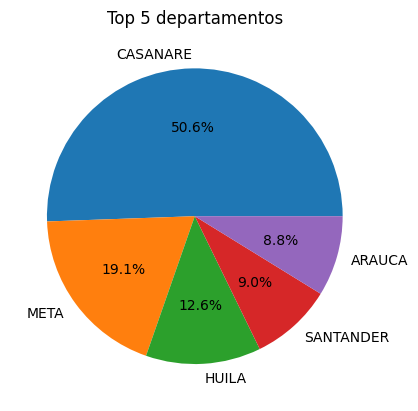

In [ ]:
plt.pie(top_departamentos.values, labels=top_departamentos.index, autopct='%1.1f%%')
plt.title('Top 5 departamentos')
plt.show()

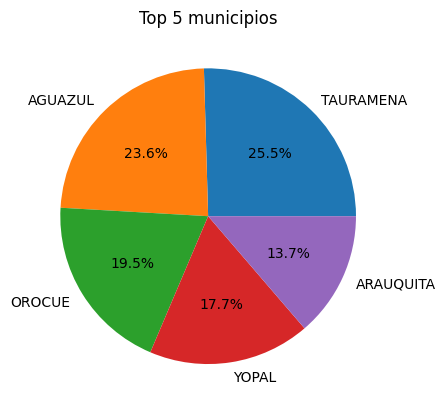

In [ ]:
plt.pie(top_municipio.values, labels=top_municipio.index, autopct='%1.1f%%')
plt.title('Top 5 municipios')
plt.show()

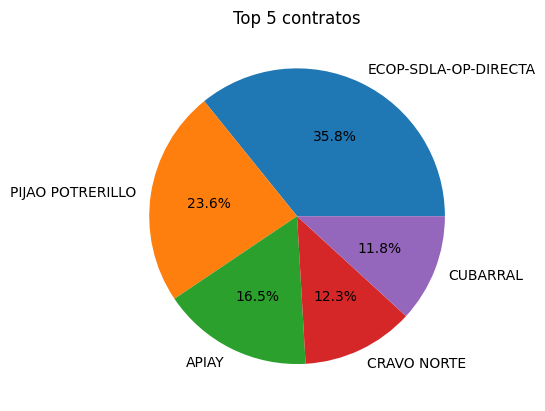

In [ ]:
plt.pie(top_contratos.values, labels=top_contratos.index, autopct='%1.1f%%')
plt.title('Top 5 contratos')
plt.show()

# Conclusión

Se puede concluir que el departamento de CASANARE, es el departamento con mayor explotación de recursos naturales siendo a su vez, el municipio de TAURAMENA, el de mayor explotación y el contrato con mayor aparición fue el de ECOP-SDLA-OP-DIRECTA. A su vez, se tuvo que la mayor regalía (en pesos colombianos) fue de 59.952.248.926,87 COP